# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [20]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Food was lousy. Who ever is pl...
1,✅ Trip Verified | Had the worst experience. Th...
2,✅ Trip Verified | The ground staff were not h...
3,✅ Trip Verified | Second time BA Premium Econ...
4,Not Verified | They changed our Flights from ...


In [21]:
df['reviews'][2]

'✅ Trip Verified |  The ground staff were not helpful. Felt like all they wanted to do was rush us to check in and then all passengers needed up waiting in a holding area for a bus anyway. Travelling with a child with a disability was a nightmare with British Airways. Logged a complaint and it took almost four weeks to answer. Lost some of our luggage. It was not a good experience.'

In [22]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [23]:
df = df.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')

In [24]:
df.head(2)

,reviews
0,Not Verified Food was lousy Who ever is plan...
1,Trip Verified Had the worst experience The f...


In [25]:
df['reviews'] = df.reviews.str.replace('Not Verified,?' , '')

<ipython-input-25-9f5e22d16d68>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df.reviews.str.replace('Not Verified,?' , '')


In [26]:
df.head(3)

,reviews
0,Food was lousy Who ever is planning the Asi...
1,Trip Verified Had the worst experience The f...
2,Trip Verified The ground staff were not hel...


In [27]:
df['reviews'] = df.reviews.str.replace('Trip Verified,?' , '')

<ipython-input-27-4bccbfd5447e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df.reviews.str.replace('Trip Verified,?' , '')


In [28]:
df.head()

,reviews
0,Food was lousy Who ever is planning the Asi...
1,Had the worst experience The flight from Lo...
2,The ground staff were not helpful Felt lik...
3,Second time BA Premium Economy in a newer ...
4,They changed our Flights from Brussels to L...


In [29]:
df['reviews'][93]

'    Old A320 with narrow pitch Flight perfectly on time with constant announcements from cockpit Friendly staff free chips and water Quick luggage delivery at T5'

In [30]:
for i in df:
    df[i]=df[i].str.lower()
df.head()

,reviews
0,food was lousy who ever is planning the asi...
1,had the worst experience the flight from lo...
2,the ground staff were not helpful felt lik...
3,second time ba premium economy in a newer ...
4,they changed our flights from brussels to l...


In [31]:
df['reviews'][93]

'    old a320 with narrow pitch flight perfectly on time with constant announcements from cockpit friendly staff free chips and water quick luggage delivery at t5'

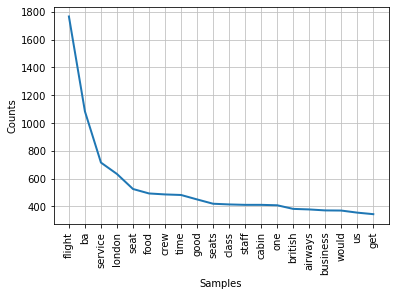

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords


# tokenize the text into individual words
words = [word.lower() for review in df['reviews'] for word in word_tokenize(review)]

# remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# calculate the frequency distribution of words
freq_dist = FreqDist(words)

# plot the top 20 most frequently occurring words
freq_dist.plot(20, cumulative=False)
plt.show()

In [36]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...


True

In [37]:

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# apply the sentiment analyzer to each review and store the results in a new column
df['sentiment_score'] = df['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# classify the reviews as positive or negative based on the sentiment score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative')

# print the number of positive and negative reviews
print('Number of positive reviews:', len(df[df['sentiment'] == 'positive']))
print('Number of negative reviews:', len(df[df['sentiment'] == 'negative']))


Number of positive reviews: 524
Number of negative reviews: 476
